# Scraping Nba Site for Players Stat

In [22]:
import pandas as pd
import requests
import numpy as np
import time

def scrape_nba_stats(season_types, years, file_name):
    df = pd.DataFrame()
    time_taken = time.time()

    for y in years:
        for s in season_types:
            url = f'https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=PerGame&Scope=S&Season={y}&SeasonType={s}&StatCategory=PTS'
            r = requests.get(url=url).json()

            # Dynamically get table headers from the API response
            table_headers = r['resultSet']['headers']
            temp_df1 = pd.DataFrame(r['resultSet']['rowSet'], columns=table_headers)
            temp_df2 = pd.DataFrame({'Years': [y] * len(temp_df1),
                                     'Season_Type': [s] * len(temp_df1)})
            temp_df3 = pd.concat([temp_df2, temp_df1], axis=1)
            df = pd.concat([df, temp_df3], axis=0)
            print(f'Finished scraping for the {y} {s}')
            lag = np.random.uniform(low=5, high=40)
            time.sleep(lag)

    print(f'Finished in {round((time.time() - time_taken) / 60, 2)} minutes')
    df.to_excel(file_name, index=False)

# Define parameters
season_types_regular = ['Regular%20Season']
season_types_playoff = ['Playoffs']
years = ['2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23', '2023-24']

# Scrape regular season stats
scrape_nba_stats(season_types_regular, years, 'players_stats_regular.xlsx')

# Scrape playoff stats
scrape_nba_stats(season_types_playoff, years, 'players_stats_playoff.xlsx')


Finished scraping for the 2013-14 Regular%20Season
Finished scraping for the 2014-15 Regular%20Season
Finished scraping for the 2015-16 Regular%20Season
Finished scraping for the 2016-17 Regular%20Season
Finished scraping for the 2017-18 Regular%20Season
Finished scraping for the 2018-19 Regular%20Season
Finished scraping for the 2019-20 Regular%20Season
Finished scraping for the 2020-21 Regular%20Season
Finished scraping for the 2021-22 Regular%20Season
Finished scraping for the 2022-23 Regular%20Season
Finished scraping for the 2023-24 Regular%20Season
Finished in 3.51 minutes
Finished scraping for the 2013-14 Playoffs
Finished scraping for the 2014-15 Playoffs
Finished scraping for the 2015-16 Playoffs
Finished scraping for the 2016-17 Playoffs
Finished scraping for the 2017-18 Playoffs
Finished scraping for the 2018-19 Playoffs
Finished scraping for the 2019-20 Playoffs
Finished scraping for the 2020-21 Playoffs
Finished scraping for the 2021-22 Playoffs
Finished scraping for the 2

# Data Processing

In [3]:
import pandas as pd
import requests
import numpy as np
import time

all_datas = []


datas_regular = pd.read_excel('players_stats_regular.xlsx')
datas_playoff = pd.read_excel('players_stats_playoff.xlsx')

all_datas.append(datas_regular)
all_datas.append(datas_playoff)
new_datas = []
for datas in all_datas:
    datas.drop(columns=["RANK","EFF"], inplace =True)
    datas['season_start_year'] = datas['Years'].str[:4].astype(int)
    datas.drop(columns=["Years"], inplace =True)
    datas['TEAM'].replace(to_replace=['NOP','NOH'], value ='NO', inplace=True)
    
    if datas['Season_Type'][0] == "Regular%20Season" :
        datas['Season_Type'].replace("Regular%20Season", "RS", inplace=True)
    datas_dummies = pd.get_dummies(datas, columns=['Season_Type', 'PLAYER', 'TEAM'])
    datas = datas_dummies
    new_datas.append(datas)

all_datas = new_datas

In [5]:
all_datas[0]

,PLAYER_ID,TEAM_ID,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,TEAM_OKC,TEAM_ORL,TEAM_PHI,TEAM_PHX,TEAM_POR,TEAM_SAC,TEAM_SAS,TEAM_TOR,TEAM_UTA,TEAM_WAS
0,201142,1610612760,81,38.5,10.5,20.8,0.503,2.4,6.1,0.391,...,True,False,False,False,False,False,False,False,False,False
1,2546,1610612752,77,38.7,9.6,21.3,0.452,2.2,5.4,0.402,...,False,False,False,False,False,False,False,False,False,False
2,2544,1610612748,77,37.7,10.0,17.6,0.567,1.5,4.0,0.379,...,False,False,False,False,False,False,False,False,False,False
3,201567,1610612750,77,36.3,8.4,18.5,0.457,2.5,6.6,0.376,...,False,False,False,False,False,False,False,False,False,False
4,201935,1610612745,73,38.0,7.5,16.5,0.456,2.4,6.6,0.366,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2785,1630231,1610612755,60,12.5,1.6,3.0,0.536,0.1,0.5,0.286,...,False,False,True,False,False,False,False,False,False,False
2786,203939,1610612742,63,13.3,1.1,1.7,0.679,0.0,0.0,0.333,...,False,False,False,False,False,False,False,False,False,False
2787,1630192,1610612743,58,9.9,1.2,2.6,0.463,0.1,0.4,0.261,...,False,False,False,False,False,False,False,False,False,False
2788,1630550,1610612766,63,12.4,1.3,2.9,0.437,0.4,1.3,0.346,...,False,False,False,False,False,False,False,False,False,False


# PREDICTIONS

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pandas as pd
import requests
import numpy as np
import time

features = list(all_datas[0].columns)

targets =  ['PTS']

X = all_datas[0][features]
y = all_datas[0][targets]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
datas_regular.dtypes

Season_Type           object
PLAYER_ID              int64
PLAYER                object
TEAM_ID                int64
TEAM                  object
GP                     int64
MIN                  float64
FGM                  float64
FGA                  float64
FG_PCT               float64
FG3M                 float64
FG3A                 float64
FG3_PCT              float64
FTM                  float64
FTA                  float64
FT_PCT               float64
OREB                 float64
DREB                 float64
REB                  float64
AST                  float64
STL                  float64
BLK                  float64
TOV                  float64
PTS                  float64
season_start_year      int32
dtype: object

In [89]:
y_train.sample

<bound method NDFrame.sample of        PTS
1096  18.0
1368  16.8
344   12.1
839   17.3
1350  20.0
...    ...
1638  16.4
1095  18.5
1130  13.9
1294   5.3
860   14.0

[1953 rows x 1 columns]>

In [91]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [127]:
predictions = model.predict(X_test)

In [129]:
predictions.shape

(837, 1)

In [101]:
test_data = pd.DataFrame(X_test, columns=features)
test_data[targets] = y_test
test_data['PTS'] = model.predict(X_test)

In [103]:
test_data['PTS']

2247     8.2
1518     7.2
1468     9.3
2498     7.2
2121    17.2
        ... 
52      15.7
1939    12.0
2280     6.2
1592    23.8
2502     7.0
Name: PTS, Length: 837, dtype: float64

In [105]:
test_data.columns

Index(['PLAYER_ID', 'TEAM_ID', 'GP', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT',
       ...
       'TEAM_OKC', 'TEAM_ORL', 'TEAM_PHI', 'TEAM_PHX', 'TEAM_POR', 'TEAM_SAC',
       'TEAM_SAS', 'TEAM_TOR', 'TEAM_UTA', 'TEAM_WAS'],
      dtype='object', length=834)

In [109]:
test_data[test_data['PTS']>17]

,PLAYER_ID,TEAM_ID,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,TEAM_OKC,TEAM_ORL,TEAM_PHI,TEAM_PHX,TEAM_POR,TEAM_SAC,TEAM_SAS,TEAM_TOR,TEAM_UTA,TEAM_WAS
2121,1629028,1610612756,58,29.5,7.6,12.0,0.634,0.1,0.3,0.368,...,False,False,False,True,False,False,False,False,False,False
1100,203914,1610612743,67,34.4,6.6,13.6,0.485,2.3,5.9,0.396,...,False,False,False,False,False,False,False,False,False,False
1622,1627734,1610612754,62,34.8,7.4,13.7,0.540,0.3,1.1,0.254,...,False,False,False,False,False,False,False,False,False,False
1627,201565,1610612765,50,26.0,7.4,15.1,0.490,0.9,2.9,0.306,...,False,False,False,False,False,False,False,False,False,False
1613,200768,1610612761,58,36.2,5.8,13.8,0.416,2.8,8.0,0.352,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360,1629018,1610612761,66,32.1,6.1,14.2,0.433,2.5,6.8,0.369,...,False,False,False,False,False,False,False,True,False,False
2092,203468,1610612740,62,34.6,8.6,18.8,0.460,2.9,7.6,0.388,...,False,False,False,False,False,False,False,False,False,False
1321,201935,1610612745,78,36.8,10.8,24.5,0.442,4.8,13.2,0.368,...,False,False,False,False,False,False,False,False,False,False
1869,203114,1610612749,68,33.4,7.5,15.8,0.476,2.2,5.4,0.414,...,False,False,False,False,False,False,False,False,False,False


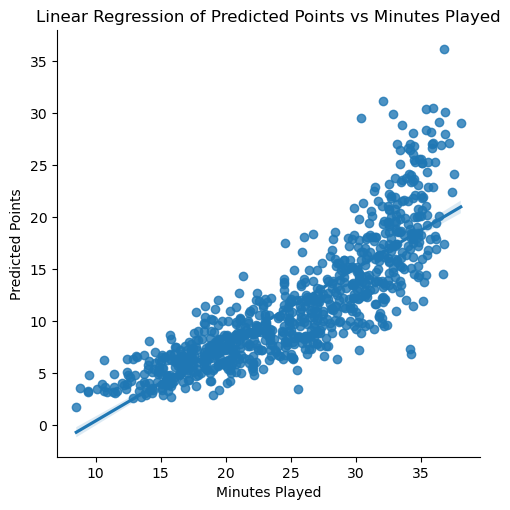

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='MIN', y='PTS', data=test_data)
plt.title('Linear Regression of Predicted Points vs Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Predicted Points')
plt.show()